# <font color='48B3C1'>**Machine Learning Model**</font>





### <font color='B048C1'>**import package**</font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore') 

### <font color='B048C1'>**Loading the exported data after preprocessing**</font>

In [19]:
df= pd.read_csv('/content/df_all.csv') 

In [20]:
df_all=df.sample(n=300000) # the total number of data 1000000 and will take 300000 as number of sample

## <font color='B048C1'>**Model 1: Regression**</font>

<font color='black'>**Predict the suitable air temperature for the specific  plants**</font>



* <font color='B048C1'>**select the input features and target feature**</font>

In [22]:
X=df_all[['STATION_NAME','ELEVATION','WIND_SPEED_RATE','SKY_CAVOK','Crop','TEMP_MIN',	'TEMP_MAX']]
Y=df_all['AIR_TEMPERATURE']

* <font color='B048C1'>**split the data**</font>

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

* <font color='B048C1'>**make a scaler to the data before train in the model**</font>

In [24]:
sc = StandardScaler()


X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

* <font color='B048C1'>**Trian the data to the Linear Regression Model**</font>

In [25]:
regressorModel1 = LinearRegression()
regressorModel1.fit(X_train, Y_train)

LinearRegression()

* <font color='B048C1'>**Model Evaluation**</font>

In [26]:
# Calculates the cost functions
def calc_cost(y_true, y_predict):
    
    "Calculate Cost Functions and print output"
    
    result_dict = {}
    
    mse = mean_squared_error(y_true, y_predict)
    mae = mean_absolute_error(y_true, y_predict)
    rmse = mean_squared_error(y_true, y_predict, squared=False)
    
    
    ls = [mse, mae, rmse]
    ls2 = ["MSE", "MAE", "RMSE"]
    
    for x in range(len(ls)):
        print(f"{ls2[x]}: {ls[x]}")
        result_dict[ls2[x]] = ls[x]
    
    return result_dict


print("Linear Regression")



print("\nIn training ")
resTrain = calc_cost(Y_train,  regressorModel1.predict(X_train))

print("\nIn testing")
resVal = calc_cost(Y_test,  regressorModel1.predict(X_test))

Linear Regression

In training 
MSE: 1.074993848810658
MAE: 0.598902931727637
RMSE: 1.0368191012952346

In testing
MSE: 1.0727145568226526
MAE: 0.5979109206704737
RMSE: 1.0357193426902158


In [27]:
print("R2: ")
r2_score(y_true=Y_test, y_pred= regressorModel1.predict(X_test))

R2: 


0.9580389079262601

## <font color='4884C1'>**Model 2: Classification**</font>

<font color='black'>**Predict the suitable season for each plant**</font>


* <font color='4884C1'>**Convert the target values into category by bins the data**</font>

In [28]:
df_all.loc[df_all['AIR_TEMPERATURE'].between(1, 20), 'Plant_Sesone'] = 'Winter'
df_all.loc[df_all['AIR_TEMPERATURE'].between(21, 25), 'Plant_Sesone'] = 'Spring'
df_all.loc[df_all['AIR_TEMPERATURE'].between(25, 35), 'Plant_Sesone'] = 'autumn'
df_all.loc[df_all['AIR_TEMPERATURE'].between(36, 50), 'Plant_Sesone'] = 'Summer'

* <font color='4884C1'>**Select the input features and target feature**</font>

In [29]:
X1=df_all[['STATION_NAME','ELEVATION','WIND_SPEED_RATE','SKY_CAVOK','Crop','TEMP_MIN',	'TEMP_MAX']]
Y1=df_all['Plant_Sesone']

* <font color='4884C1'>**Split the data**</font>

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size = 0.25, random_state = 0)

* <font color='4884C1'>**make a scaler to the data before train in the model**</font>

In [31]:
# Feature Engeenring 
sc = StandardScaler()


X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

* <font color='4884C1'>**Trian the data to the Logistic Regression Model**</font>

In [32]:
classifierModel=LogisticRegression()
classifierModel.fit(X_train, Y_train)

LogisticRegression()

* <font color='4884C1'>**Model Evaluation**</font>

In [33]:
classifierModel.score(X_train, Y_train)

0.9493466666666667

In [34]:
#Predict the model 
Model1Pred = classifierModel.predict(X_test)
print(classification_report(Y_test, Model1Pred))

              precision    recall  f1-score   support

      Spring       0.93      0.86      0.89     14964
      Summer       0.55      0.66      0.60       596
      Winter       0.98      0.99      0.98     32356
      autumn       0.94      0.96      0.95     27084

    accuracy                           0.95     75000
   macro avg       0.85      0.87      0.86     75000
weighted avg       0.95      0.95      0.95     75000



Text(0.5, 1.0, 'Logistic Regression Results')

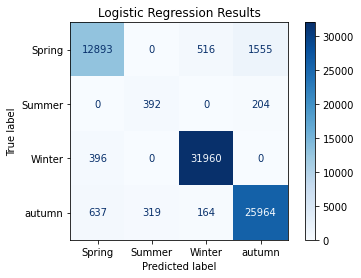

In [37]:
Model1Matrix = plot_confusion_matrix(classifierModel, X_test, Y_test, cmap='Blues')
Model1Matrix.ax_.set_title('Logistic Regression Results')